# Plotting Tools

In [1]:
import os
import csv

import numpy as np
from scipy.io import loadmat, savemat
import matplotlib.pyplot as plt

### Basic plotting example

[[  3.10862032   7.47906311  67.54424272 152.85509271 177.47815197
  175.6965856  161.12670377 177.4588091  177.57718321 179.21419672
  174.67124753 178.71217399 179.55659096 177.42472036 179.93228073]]
[[  3.10862032   7.47906311  67.54424272 152.85509271 177.47815197
  177.47815197 177.47815197 177.47815197 177.57718321 179.21419672
  179.21419672 179.21419672 179.55659096 179.55659096 179.93228073]]


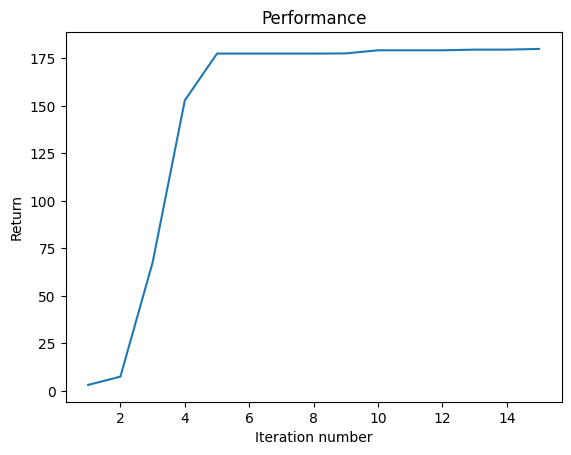

In [22]:
log_dir = "log/"          # Directory specified in script, not including date+time
min_num_trials = 15   # Plots up to this many trials

returns = []
for subdir in os.listdir(log_dir):
    data = loadmat(os.path.join(log_dir, subdir, "logs.mat"))
    print(data["returns"])
    if data["returns"].shape[1] >= min_num_trials:
        returns.append(data["returns"][0][:min_num_trials])
        
returns = np.array(returns)
returns = np.maximum.accumulate(returns, axis=-1)
print(returns)
mean = np.mean(returns, axis=0)

# Plot result
plt.figure()
plt.plot(np.arange(1, min_num_trials + 1), mean)
plt.title("Performance")
plt.xlabel("Iteration number")
plt.ylabel("Return")
plt.show()